In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
df = pd.read_csv('kd_csv.csv')

In [3]:
# kd.head()

In [4]:
# kd.apply(kd.shift(-1), states)

In [24]:
def states(quarter, make, value, previous_quarter, previous_make, previous_value):
    if pd.isna(previous_make) or previous_quarter < quarter:
        prev_state = "START"
        state = make + "_" + str(int(value))
    else:
        prev_state = previous_make +  "_" +str(int(previous_value))
        state = make +  "_" +str(int(value))
    return (prev_state, state)

In [25]:
previous = df[['QUARTER','MAKE_MISS', 'VALUE']].shift(1)
previous.columns = ['PREVIOUS_QUARTER','PREVIOUS_MAKE_MISS', 'PREVIOUS_VALUE']
df_with_previous = pd.concat([df, previous], axis=1)

In [26]:
df_with_states = df_with_previous.apply(lambda x: states(x.QUARTER, x.MAKE_MISS, x.VALUE, x.PREVIOUS_QUARTER, x.PREVIOUS_MAKE_MISS, x.PREVIOUS_VALUE), axis=1)

In [31]:
df[['PREV_STATE', 'STATE']] = pd.DataFrame(df_with_states.to_list())

In [32]:
df

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE,team,PREV_STATE,STATE
0,22.0 ft,28.8 ft,1.0,10:49.0,Kevin Durant,MAKE,3.0,26 ft,NaN,START,MAKE_3
1,28.7 ft,4.58 ft,1.0,10:23.0,Kevin Durant,MAKE,2.0,5 ft,NaN,MAKE_3,MAKE_2
2,34.8 ft,13.1 ft,1.0,8:46.0,Kevin Durant,MAKE,2.0,15 ft,NaN,MAKE_2,MAKE_2
3,22.8 ft,14.1 ft,1.0,8:18.0,Kevin Durant,MISS,2.0,11 ft,NaN,MAKE_2,MISS_2
4,24.4 ft,5.17 ft,1.0,7:47.0,Kevin Durant,MISS,2.0,2 ft,NaN,MISS_2,MISS_2
...,...,...,...,...,...,...,...,...,...,...,...
2065,36.1 ft,4.77 ft,4.0,2:37.0,Kevin Durant,MISS,2.0,12 ft,NaN,MAKE_2,MISS_2
2066,13.8 ft,13.1 ft,4.0,1:28.0,Kevin Durant,MAKE,2.0,14 ft,NaN,MISS_2,MAKE_2
2067,30.3 ft,28.6 ft,4.0,0:55.0,Kevin Durant,MISS,3.0,26 ft,NaN,MAKE_2,MISS_3
2068,33.8 ft,26.8 ft,4.0,0:10.0,Kevin Durant,MISS,3.0,26 ft,NaN,MISS_3,MISS_3


In [60]:
df2 = df.groupby("PREV_STATE")["STATE"].apply(lambda s: s.value_counts()).unstack()

,MAKE_2,MISS_2,MISS_3,MAKE_3
PREV_STATE,,,,
MAKE_2,290,205,118,94
MAKE_3,83,57,51,21
MISS_2,229,192,87,55
MISS_3,123,105,39,24
START,114,88,49,46


In [61]:
df2["MAKE_2"]/ (df2["MAKE_2"] + df2["MISS_2"])

PREV_STATE
MAKE_2    0.585859
MAKE_3    0.592857
MISS_2    0.543943
MISS_3    0.539474
START     0.564356
dtype: float64

In [70]:
def states_proportions(x):
    mask = x.isin(["MISS_2", "MAKE_2"])
    filtered = x[mask]
    return (filtered=='MAKE_2').mean()

df.groupby("PREV_STATE")["STATE"].apply(states_proportions).rename("%MAKE_2").to_frame()

,%MAKE_2
PREV_STATE,
MAKE_2,0.585859
MAKE_3,0.592857
MISS_2,0.543943
MISS_3,0.539474
START,0.564356


In [94]:
df_matrix = df.groupby("PREV_STATE")["STATE"].apply(lambda s: s.value_counts(normalize=True)).unstack()
df_matrix['START'] = 0
df_matrix = df_matrix.reindex(df_matrix.columns.sort_values(ascending=False), axis=1)
df_matrix = df_matrix.sort_index(ascending=False)

In [97]:
df_matrix

,START,MISS_3,MISS_2,MAKE_3,MAKE_2
PREV_STATE,,,,,
START,0,0.164983,0.296296,0.154882,0.383838
MISS_3,0,0.134021,0.360825,0.082474,0.422680
MISS_2,0,0.154529,0.341030,0.097691,0.406750
MAKE_3,0,0.240566,0.268868,0.099057,0.391509
MAKE_2,0,0.166902,0.289958,0.132956,0.410184


In [77]:
def is_make(m):
    return (m=='MAKE').mean()
df.pivot_table(index="PREV_STATE", columns="VALUE", values="MAKE_MISS", aggfunc=is_make)

VALUE,2.0,3.0
PREV_STATE,,
MAKE_2,0.585859,0.443396
MAKE_3,0.592857,0.291667
MISS_2,0.543943,0.387324
MISS_3,0.539474,0.380952
START,0.564356,0.484211


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
ddf = pd.DataFrame(df_with_states)
ddf.columns = ['STATE']

In [10]:
ddf3 = df.assign(STATE=df_with_states)

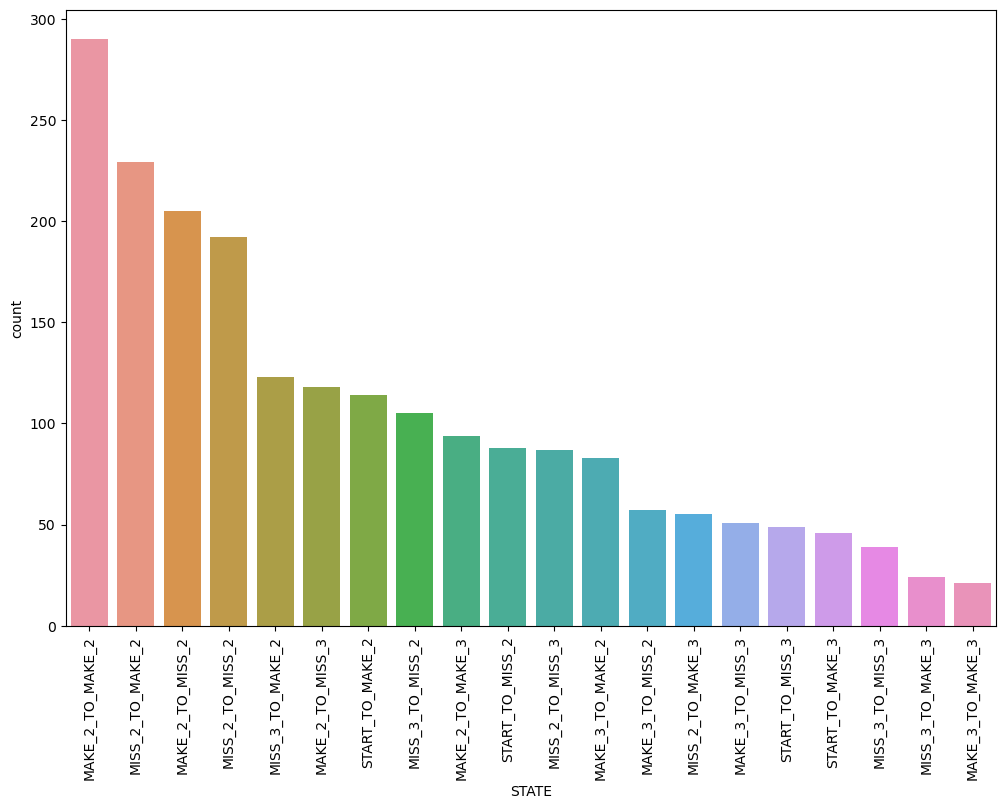

In [11]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(data=ddf, x='STATE', order=ddf['STATE'].value_counts().index)
plt.savefig('states.png')

In [12]:
import calcualte_states

In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
ddf2 = calcualte_states.generate_states(df)

In [17]:
ddf2.head()

,x,y,QUARTER,TIME_REMAINING,PLAYER,MAKE_MISS,VALUE,DISTANCE,team,STATE
0,22.0 ft,28.8 ft,1.0,10:49.0,Kevin Durant,MAKE,3.0,26 ft,NaN,START_TO_MAKE_3
1,28.7 ft,4.58 ft,1.0,10:23.0,Kevin Durant,MAKE,2.0,5 ft,NaN,MAKE_3_TO_MAKE_2
2,34.8 ft,13.1 ft,1.0,8:46.0,Kevin Durant,MAKE,2.0,15 ft,NaN,MAKE_2_TO_MAKE_2
3,22.8 ft,14.1 ft,1.0,8:18.0,Kevin Durant,MISS,2.0,11 ft,NaN,MAKE_2_TO_MISS_2
4,24.4 ft,5.17 ft,1.0,7:47.0,Kevin Durant,MISS,2.0,2 ft,NaN,MISS_2_TO_MISS_2


<AxesSubplot: xlabel='STATE', ylabel='count'>

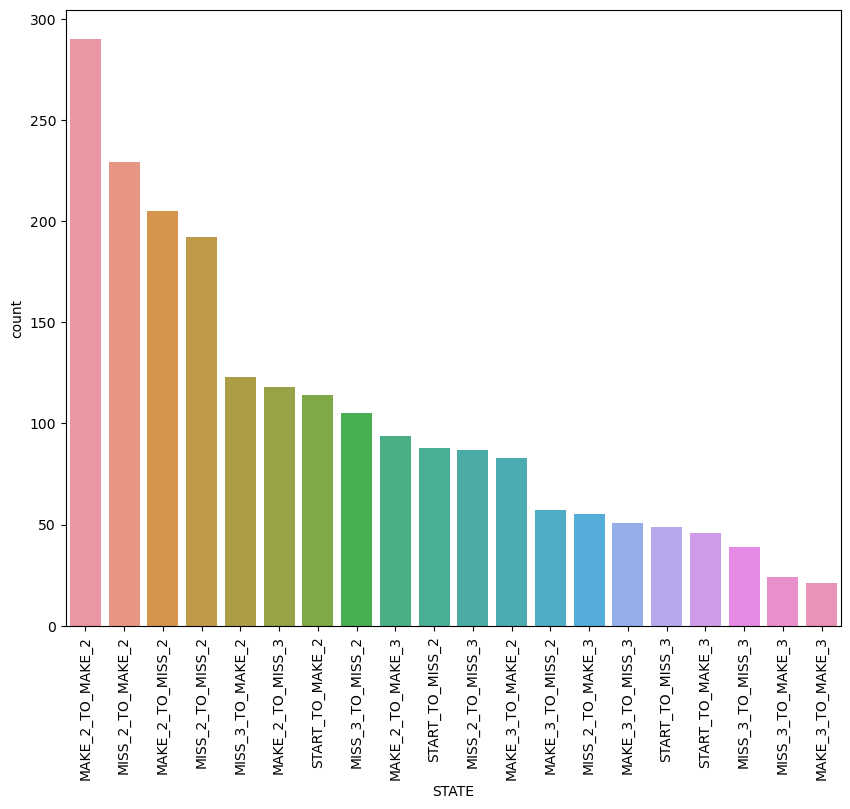

In [16]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot(data=ddf2, x='STATE', order=ddf2['STATE'].value_counts().index)

In [21]:
ddf2['BINARY_MAKE_MISS'] = ddf2['MAKE_MISS'].apply(lambda m: m=='MAKE')

In [23]:
ddf2['VALUE'] == 

,QUARTER,VALUE,team,BINARY_MAKE_MISS
STATE,,,,
MAKE_2_TO_MAKE_2,2.220690,2.0,NaN,1.0
MAKE_2_TO_MAKE_3,2.542553,3.0,NaN,1.0
MAKE_2_TO_MISS_2,2.214634,2.0,NaN,0.0
MAKE_2_TO_MISS_3,2.474576,3.0,NaN,0.0
MAKE_3_TO_MAKE_2,2.373494,2.0,NaN,1.0
MAKE_3_TO_MAKE_3,2.714286,3.0,NaN,1.0
MAKE_3_TO_MISS_2,2.421053,2.0,NaN,0.0
MAKE_3_TO_MISS_3,2.686275,3.0,NaN,0.0
MISS_2_TO_MAKE_2,2.275109,2.0,NaN,1.0
